In [1]:
# data loading
from scripts.benchmark_data_scripts.data_preprocessing import load_data, preprocess_data, split_data
path = "../../data/benchmark_data"
training_data, ground_truth = load_data(path=path)
training_data.head()
ground_truth.head()


,TreatmentLessonConstructId,QuestionConstructId,Year,ControlLessonConstructIds,ControlUsersCount,TreatmentUsersCount,ate_p_1__,ate_k_1__
0,206,211,7,{3119},73,94,0.033656,-0.019091
1,206,212,7,{3119},77,101,-0.022222,-0.036004
2,206,216,7,{3119},75,94,-0.109501,-0.118014
3,206,217,7,{3119},76,95,0.097861,0.107895
4,206,218,7,{3119},74,94,-0.029598,-0.010351


In [ ]:
# data preprocessing
meta_learner_data = preprocess_data(training_data, ground_truth)

C:\Users\dell\OneDrive\Desktop\Thesis\CATE_Estimation_using_Meta_Learners\scripts\benchmark_data_scripts\data_preprocessing.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatment_group["Treatment"] = 1
C:\Users\dell\OneDrive\Desktop\Thesis\CATE_Estimation_using_Meta_Learners\scripts\benchmark_data_scripts\data_preprocessing.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_group["Treatment"] = 0


In [4]:
# train test split
X_train_p, X_test_p, y_train_p, y_test_p, X_train_k, X_test_k, y_train_k, y_test_k = split_data(meta_learner_data)


In [5]:
# S-Learner
from models.Meta_learners_benchmark_data.s_learner import s_learner

# Evaluate S-Learner for Hypothesis 1 (ate_p_1__)
s_learner_cate_p, s_learner_mse_p, s_learner_bias_p, s_learner_variance_p = s_learner(X_train_p, X_test_p, y_train_p, y_test_p)

# Evaluate S-Learner for Hypothesis 2 (ate_k_1__)
s_learner_cate_k, s_learner_mse_k, s_learner_bias_k, s_learner_variance_k = s_learner(X_train_k, X_test_k, y_train_k, y_test_k)

# Output results
print(f"S-Learner MSE (Hypothesis 1): {s_learner_mse_p}")
print(f"S-Learner Bias (Hypothesis 1): {s_learner_bias_p}")
print(f"S-Learner Variance (Hypothesis 1): {s_learner_variance_p}")
print(f"S-Learner MSE (Hypothesis 2): {s_learner_mse_k}")
print(f"S-Learner Bias (Hypothesis 2): {s_learner_bias_k}")
print(f"S-Learner Variance (Hypothesis 2): {s_learner_variance_k}")


S-Learner MSE (Hypothesis 1): 0.1524991944653632
S-Learner Bias (Hypothesis 1): -0.29109086044607757
S-Learner Variance (Hypothesis 1): 0.0028504399603998106
S-Learner MSE (Hypothesis 2): 0.1593864814548692
S-Learner Bias (Hypothesis 2): -0.3037590326029168
S-Learner Variance (Hypothesis 2): 0.0027394518980713984


In [6]:
# T-Learner
from models.Meta_learners_benchmark_data.t_learner import t_learner

# Evaluate T-Learner for Hypothesis 1 (ate_p_1__)
t_learner_cate_p, t_learner_mse_p, t_learner_bias_p, t_learner_variance_p = t_learner(X_train_p, X_test_p, y_train_p, y_test_p)

# Evaluate T-Learner for Hypothesis 2 (ate_k_1__)
t_learner_cate_k, t_learner_mse_k, t_learner_bias_k, t_learner_variance_k = t_learner(X_train_k, X_test_k, y_train_k, y_test_k)
# Output results
print(f"T-Learner MSE (Hypothesis 1): {t_learner_mse_p}")
print(f"T-Learner Bias (Hypothesis 1): {t_learner_bias_p}")
print(f"T-Learner Variance (Hypothesis 1): {t_learner_variance_p}")
print(f"T-Learner MSE (Hypothesis 2): {t_learner_mse_k}")
print(f"T-Learner Bias (Hypothesis 2): {t_learner_bias_k}")
print(f"T-Learner Variance (Hypothesis 2): {t_learner_variance_k}")

T-Learner MSE (Hypothesis 1): 0.20903185739804947
T-Learner Bias (Hypothesis 1): -0.17356439443657373
T-Learner Variance (Hypothesis 1): 0.06443958255755375
T-Learner MSE (Hypothesis 2): 0.15279099265632762
T-Learner Bias (Hypothesis 2): -0.1130711293230017
T-Learner Variance (Hypothesis 2): 0.0621821445135358


In [7]:
# X-Learner
from models.Meta_learners_benchmark_data.x_learner import x_learner

# Evaluate X-Learner for Hypothesis 1 (ate_p_1__)
x_learner_cate_p, x_learner_mse_p, x_learner_bias_p, x_learner_variance_p = x_learner(X_train_p, X_test_p, y_train_p, y_test_p)

# Evaluate X-Learner for Hypothesis 2 (ate_k_1__)
x_learner_cate_k, x_learner_mse_k, x_learner_bias_k, x_learner_variance_k = x_learner(X_train_k, X_test_k, y_train_k, y_test_k)
# Output results
print(f"X-Learner MSE (Hypothesis 1): {x_learner_mse_p}")
print(f"X-Learner Bias (Hypothesis 1): {x_learner_bias_p}")
print(f"X-Learner Variance (Hypothesis 1): {x_learner_variance_p}")
print(f"X-Learner MSE (Hypothesis 2): {x_learner_mse_k}")
print(f"X-Learner Bias (Hypothesis 2): {x_learner_bias_k}")
print(f"X-Learner Variance (Hypothesis 2): {x_learner_variance_k}")

X-Learner MSE (Hypothesis 1): 0.0823590132016153
X-Learner Bias (Hypothesis 1): -0.164228388831352
X-Learner Variance (Hypothesis 1): 0.008916658428435859
X-Learner MSE (Hypothesis 2): 0.06050154386980116
X-Learner Bias (Hypothesis 2): -0.10025277418779915
X-Learner Variance (Hypothesis 2): 0.011522013043068852


c:\Users\dell\OneDrive\Desktop\Thesis\CATE_Estimation_using_Meta_Learners\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\dell\OneDrive\Desktop\Thesis\CATE_Estimation_using_Meta_Learners\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative

In [8]:
# R-Learner
from models.Meta_learners_benchmark_data.r_learner import r_learner

# Evaluate R-Learner for Hypothesis 1 (ate_p_1__)
r_learner_cate_p, r_learner_mse_p, r_learner_bias_p, r_learner_variance_p = r_learner(X_train_p, X_test_p, y_train_p, y_test_p)

# Evaluate R-Learner for Hypothesis 2 (ate_k_1__)
r_learner_cate_k, r_learner_mse_k, r_learner_bias_k, r_learner_variance_k = r_learner(X_train_k, X_test_k, y_train_k, y_test_k)
# Output results
print(f"R-Learner MSE (Hypothesis 1): {r_learner_mse_p}")
print(f"R-Learner Bias (Hypothesis 1): {r_learner_bias_p}")
print(f"R-Learner Variance (Hypothesis 1): {r_learner_variance_p}")
print(f"R-Learner MSE (Hypothesis 2): {r_learner_mse_k}")
print(f"R-Learner Bias (Hypothesis 2): {r_learner_bias_k}")
print(f"R-Learner Variance (Hypothesis 2): {r_learner_variance_k}")

C:\Users\dell\OneDrive\Desktop\Thesis\CATE_Estimation_using_Meta_Learners\models\Meta_learners_benchmark_data\r_learner.py:49: RuntimeWarning: divide by zero encountered in divide
  residual_target = y_residual_scaled / t_residual_scaled
C:\Users\dell\OneDrive\Desktop\Thesis\CATE_Estimation_using_Meta_Learners\models\Meta_learners_benchmark_data\r_learner.py:49: RuntimeWarning: invalid value encountered in divide
  residual_target = y_residual_scaled / t_residual_scaled


R-Learner MSE (Hypothesis 1): 0.7824222180005729
R-Learner Bias (Hypothesis 1): 0.5957781572296632
R-Learner Variance (Hypothesis 1): 0.4312034835993463
R-Learner MSE (Hypothesis 2): 0.6400341353101661
R-Learner Bias (Hypothesis 2): 0.5193954578957724
R-Learner Variance (Hypothesis 2): 0.39029210186448327


C:\Users\dell\OneDrive\Desktop\Thesis\CATE_Estimation_using_Meta_Learners\models\Meta_learners_benchmark_data\r_learner.py:49: RuntimeWarning: divide by zero encountered in divide
  residual_target = y_residual_scaled / t_residual_scaled
C:\Users\dell\OneDrive\Desktop\Thesis\CATE_Estimation_using_Meta_Learners\models\Meta_learners_benchmark_data\r_learner.py:49: RuntimeWarning: invalid value encountered in divide
  residual_target = y_residual_scaled / t_residual_scaled


In [9]:
import pandas as pd
# Collect results for all learners for both hypotheses (Hypothesis 1: ate_p_1__, Hypothesis 2: ate_k_1__)
results = {
    "Learner": ["S-Learner", "T-Learner", "X-Learner", "R-Learner"],
    
    # MSE for both hypotheses
    "MSE_Hypothesis_1": [
        s_learner_mse_p,  # S-Learner MSE for Hypothesis 1 (ate_p_1__)
        t_learner_mse_p,  # T-Learner MSE for Hypothesis 1 (ate_p_1__)
        x_learner_mse_p,  # X-Learner MSE for Hypothesis 1 (ate_p_1__)
        r_learner_mse_p,  # R-Learner MSE for Hypothesis 1 (ate_p_1__)
    ],
    "MSE_Hypothesis_2": [
        s_learner_mse_k,  # S-Learner MSE for Hypothesis 2 (ate_k_1__)
        t_learner_mse_k,  # T-Learner MSE for Hypothesis 2 (ate_k_1__)
        x_learner_mse_k,  # X-Learner MSE for Hypothesis 2 (ate_k_1__)
        r_learner_mse_k,  # R-Learner MSE for Hypothesis 2 (ate_k_1__)
    ],
    
    # Bias for both hypotheses
    "Bias_Hypothesis_1": [
        s_learner_bias_p,  # S-Learner Bias for Hypothesis 1 (ate_p_1__)
        t_learner_bias_p,  # T-Learner Bias for Hypothesis 1 (ate_p_1__)
        x_learner_bias_p,  # X-Learner Bias for Hypothesis 1 (ate_p_1__)
        r_learner_bias_p,  # R-Learner Bias for Hypothesis 1 (ate_p_1__)
    ],
    "Bias_Hypothesis_2": [
        s_learner_bias_k,  # S-Learner Bias for Hypothesis 2 (ate_k_1__)
        t_learner_bias_k,  # T-Learner Bias for Hypothesis 2 (ate_k_1__)
        x_learner_bias_k,  # X-Learner Bias for Hypothesis 2 (ate_k_1__)
        r_learner_bias_k,  # R-Learner Bias for Hypothesis 2 (ate_k_1__)
    ],
    
    # Variance for both hypotheses
    "Variance_Hypothesis_1": [
        s_learner_variance_p,  # S-Learner Variance for Hypothesis 1 (ate_p_1__)
        t_learner_variance_p,  # T-Learner Variance for Hypothesis 1 (ate_p_1__)
        x_learner_variance_p,  # X-Learner Variance for Hypothesis 1 (ate_p_1__)
        r_learner_variance_p,  # R-Learner Variance for Hypothesis 1 (ate_p_1__)
    ],
    "Variance_Hypothesis_2": [
        s_learner_variance_k,  # S-Learner Variance for Hypothesis 2 (ate_k_1__)
        t_learner_variance_k,  # T-Learner Variance for Hypothesis 2 (ate_k_1__)
        x_learner_variance_k,  # X-Learner Variance for Hypothesis 2 (ate_k_1__)
        r_learner_variance_k,  # R-Learner Variance for Hypothesis 2 (ate_k_1__)
    ]
}

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Optionally, save to a CSV file
results_df.to_csv("meta_learner_comparison_both_hypotheses.csv", index=False)


     Learner  MSE_Hypothesis_1  MSE_Hypothesis_2  Bias_Hypothesis_1  \
0  S-Learner          0.152499          0.159386          -0.291091   
1  T-Learner          0.209032          0.152791          -0.173564   
2  X-Learner          0.082359          0.060502          -0.164228   
3  R-Learner          0.782422          0.640034           0.595778   

   Bias_Hypothesis_2  Variance_Hypothesis_1  Variance_Hypothesis_2  
0          -0.303759               0.002850               0.002739  
1          -0.113071               0.064440               0.062182  
2          -0.100253               0.008917               0.011522  
3           0.519395               0.431203               0.390292  


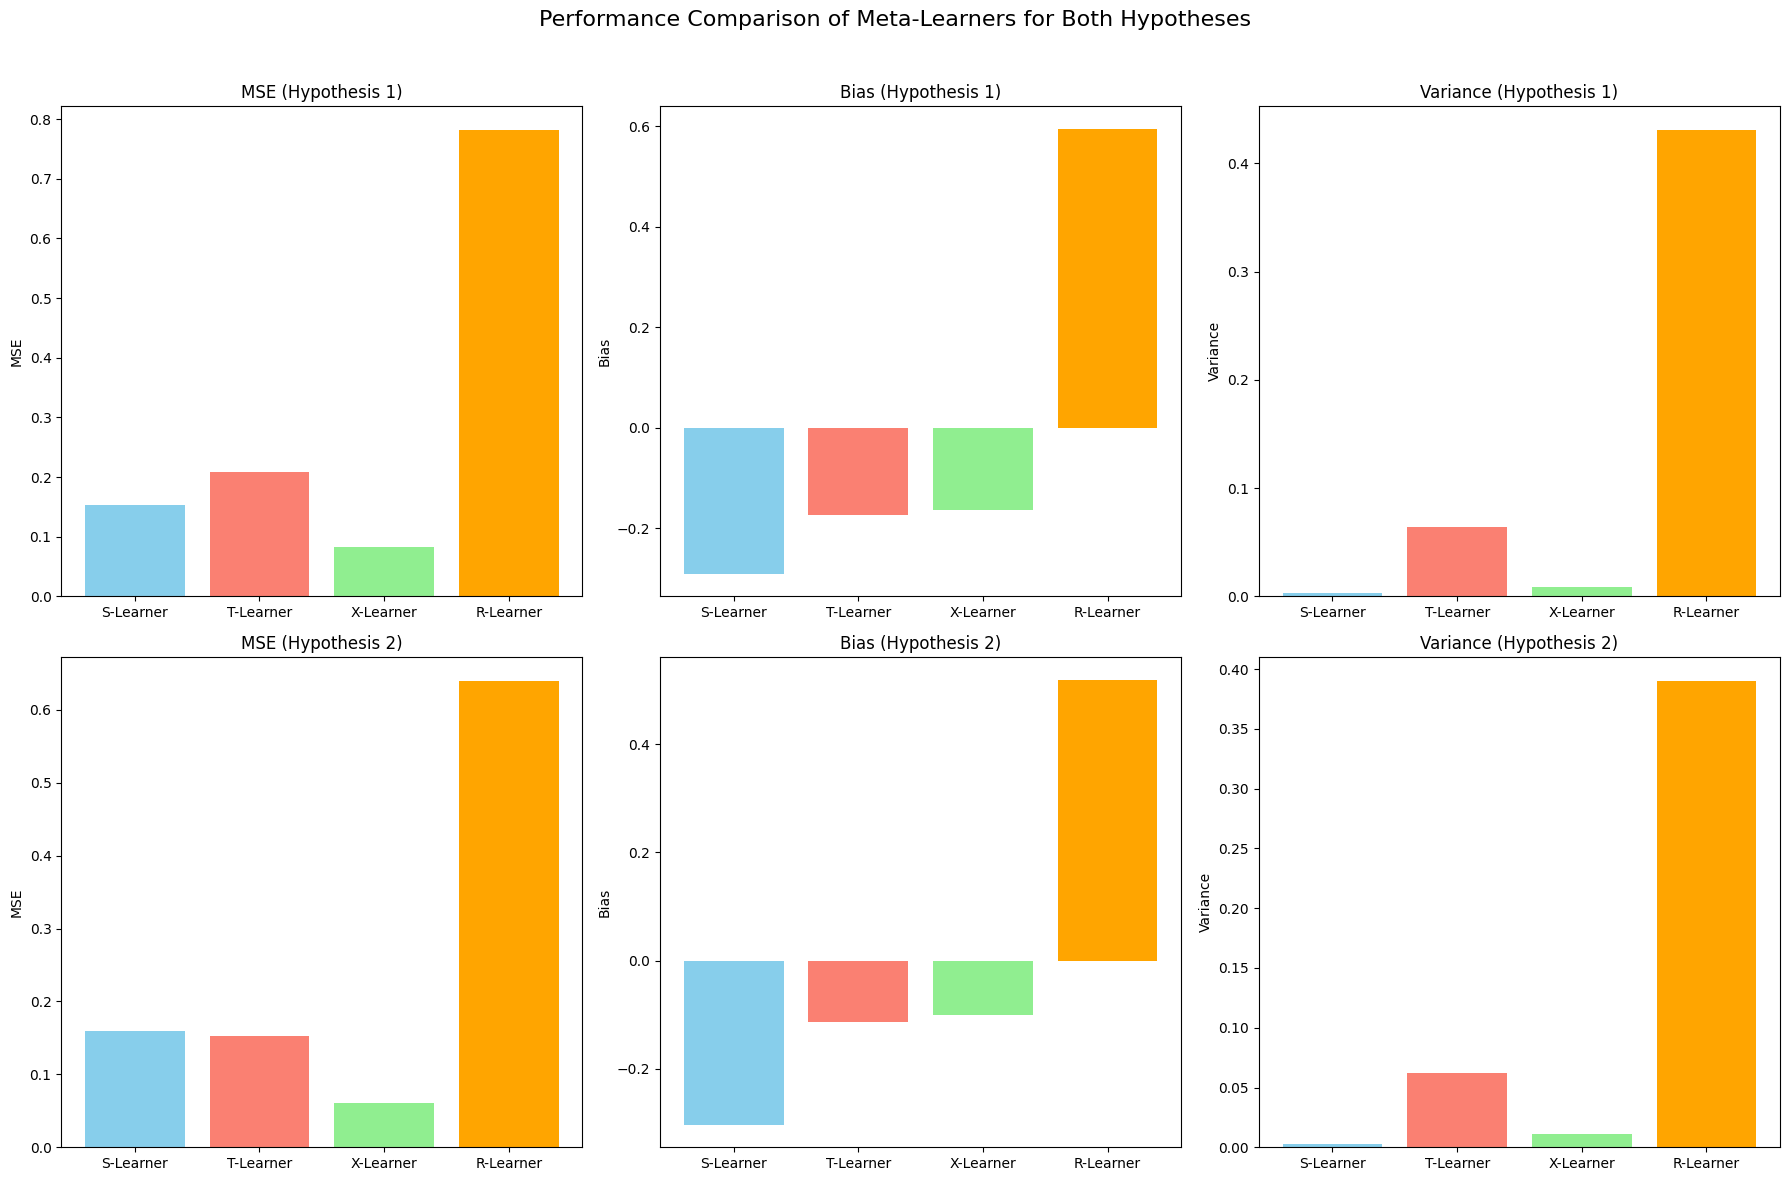

In [10]:
import matplotlib.pyplot as plt

# Set up a figure with two rows and three columns (1 row for Hypothesis 1, 1 row for Hypothesis 2)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# MSE comparison for Hypothesis 1
axes[0, 0].bar(results_df["Learner"], results_df["MSE_Hypothesis_1"], color=['skyblue', 'salmon', 'lightgreen', 'orange'])
axes[0, 0].set_title("MSE (Hypothesis 1)")
axes[0, 0].set_ylabel("MSE")

# Bias comparison for Hypothesis 1
axes[0, 1].bar(results_df["Learner"], results_df["Bias_Hypothesis_1"], color=['skyblue', 'salmon', 'lightgreen', 'orange'])
axes[0, 1].set_title("Bias (Hypothesis 1)")
axes[0, 1].set_ylabel("Bias")

# Variance comparison for Hypothesis 1
axes[0, 2].bar(results_df["Learner"], results_df["Variance_Hypothesis_1"], color=['skyblue', 'salmon', 'lightgreen', 'orange'])
axes[0, 2].set_title("Variance (Hypothesis 1)")
axes[0, 2].set_ylabel("Variance")

# MSE comparison for Hypothesis 2
axes[1, 0].bar(results_df["Learner"], results_df["MSE_Hypothesis_2"], color=['skyblue', 'salmon', 'lightgreen', 'orange'])
axes[1, 0].set_title("MSE (Hypothesis 2)")
axes[1, 0].set_ylabel("MSE")

# Bias comparison for Hypothesis 2
axes[1, 1].bar(results_df["Learner"], results_df["Bias_Hypothesis_2"], color=['skyblue', 'salmon', 'lightgreen', 'orange'])
axes[1, 1].set_title("Bias (Hypothesis 2)")
axes[1, 1].set_ylabel("Bias")

# Variance comparison for Hypothesis 2
axes[1, 2].bar(results_df["Learner"], results_df["Variance_Hypothesis_2"], color=['skyblue', 'salmon', 'lightgreen', 'orange'])
axes[1, 2].set_title("Variance (Hypothesis 2)")
axes[1, 2].set_ylabel("Variance")

# Display plots
plt.suptitle("Performance Comparison of Meta-Learners for Both Hypotheses", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to prevent overlap with the suptitle
plt.show()


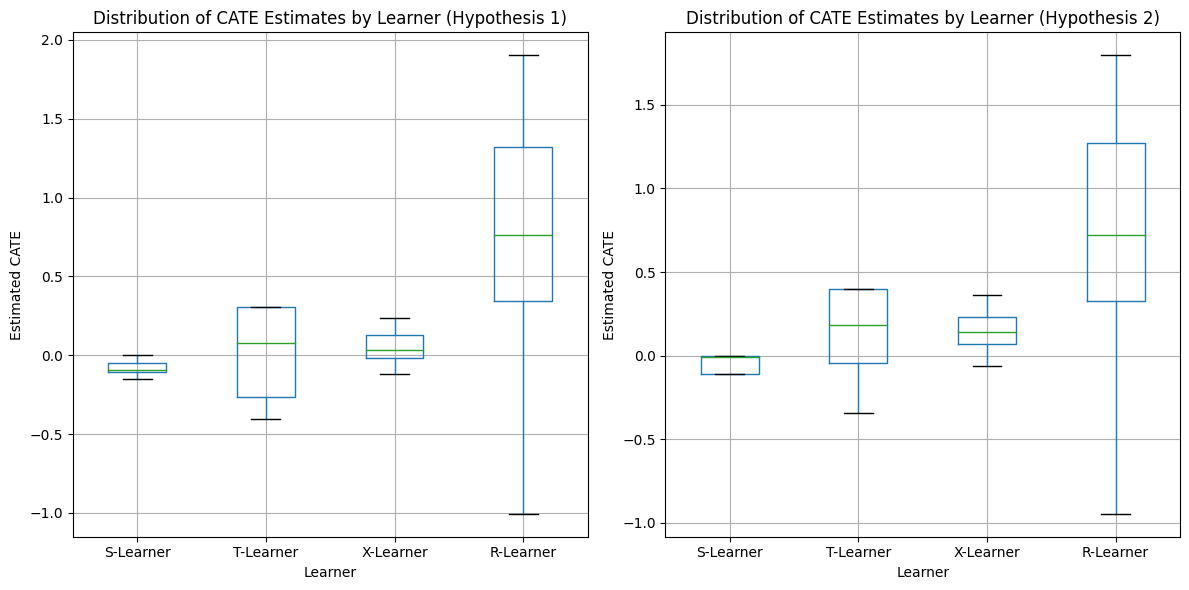

In [11]:
# Assuming you have the CATE estimates for both hypotheses from each learner (s_learner_cate, t_learner_cate, etc.)

# Create a DataFrame for CATE estimates for Hypothesis 1
cate_df_hypothesis_1 = pd.DataFrame({
    "S-Learner": s_learner_cate_p,  # CATE for Hypothesis 1 (ate_p_1__)
    "T-Learner": t_learner_cate_p,  # CATE for Hypothesis 1
    "X-Learner": x_learner_cate_p,  # CATE for Hypothesis 1
    "R-Learner": r_learner_cate_p   # CATE for Hypothesis 1
})

# Create a DataFrame for CATE estimates for Hypothesis 2
cate_df_hypothesis_2 = pd.DataFrame({
    "S-Learner": s_learner_cate_k,  # CATE for Hypothesis 2 (ate_k_1__)
    "T-Learner": t_learner_cate_k,  # CATE for Hypothesis 2
    "X-Learner": x_learner_cate_k,  # CATE for Hypothesis 2
    "R-Learner": r_learner_cate_k   # CATE for Hypothesis 2
})

# Plot the box plot for Hypothesis 1
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Left subplot for Hypothesis 1
cate_df_hypothesis_1.boxplot()
plt.title("Distribution of CATE Estimates by Learner (Hypothesis 1)")
plt.ylabel("Estimated CATE")
plt.xlabel("Learner")

# Plot the box plot for Hypothesis 2
plt.subplot(1, 2, 2)  # Right subplot for Hypothesis 2
cate_df_hypothesis_2.boxplot()
plt.title("Distribution of CATE Estimates by Learner (Hypothesis 2)")
plt.ylabel("Estimated CATE")
plt.xlabel("Learner")

# Adjust layout and display plots
plt.tight_layout()
plt.show()


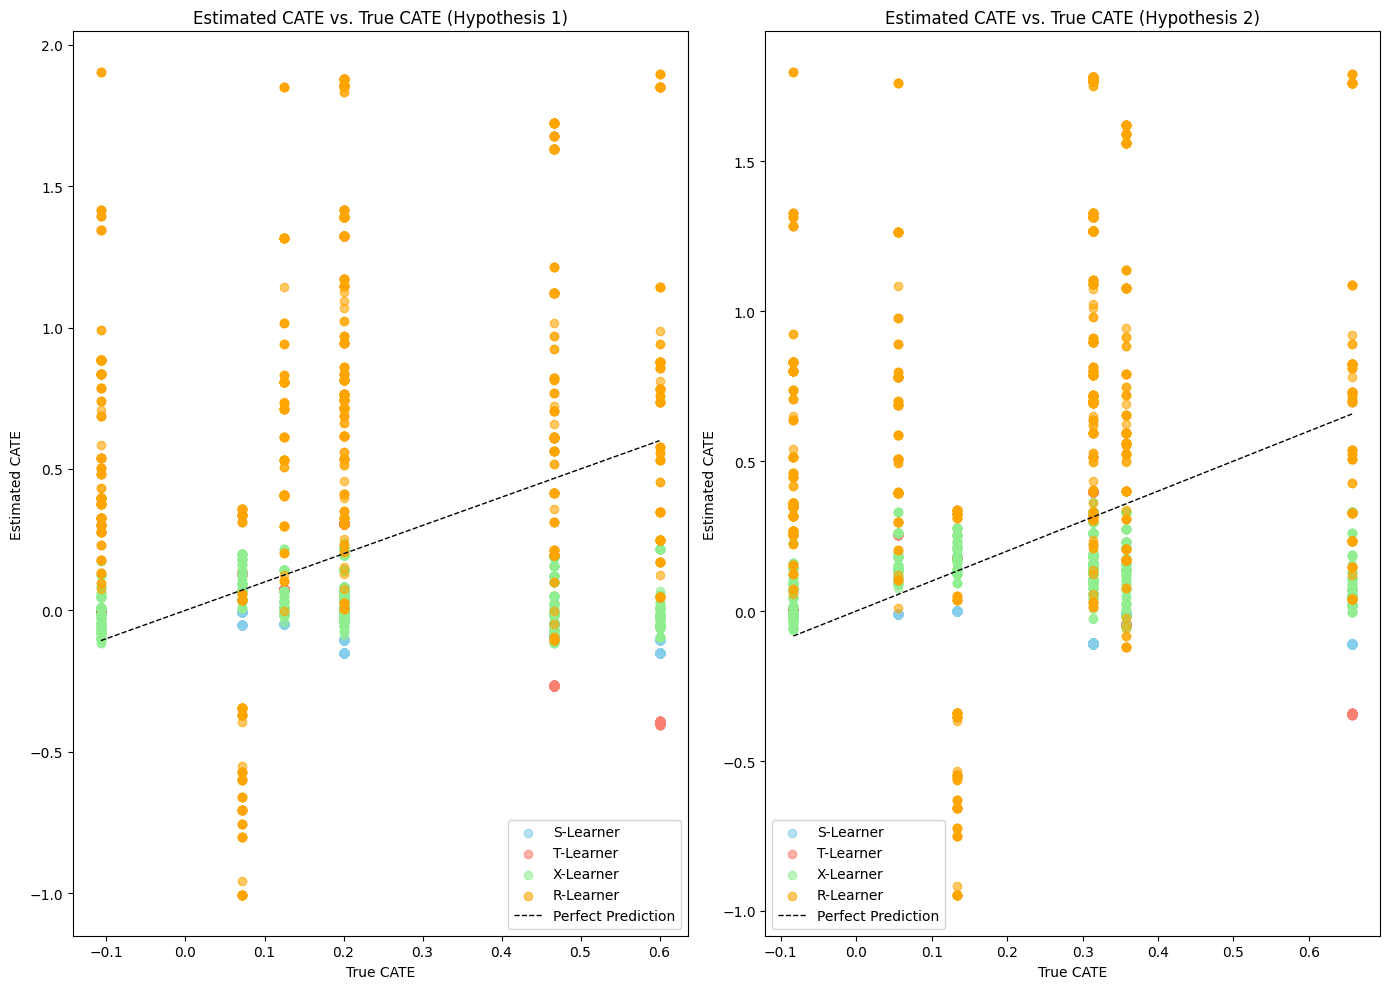

In [12]:
# Assuming y_test_p is the True CATE for Hypothesis 1 and y_test_k is the True CATE for Hypothesis 2

plt.figure(figsize=(14, 10))

# Create a subplot for Hypothesis 1 (using y_test_p as the true CATE)
plt.subplot(1, 2, 1)
plt.scatter(y_test_p, s_learner_cate_p, alpha=0.6, label="S-Learner", color='skyblue')
plt.scatter(y_test_p, t_learner_cate_p, alpha=0.6, label="T-Learner", color='salmon')
plt.scatter(y_test_p, x_learner_cate_p, alpha=0.6, label="X-Learner", color='lightgreen')
plt.scatter(y_test_p, r_learner_cate_p, alpha=0.6, label="R-Learner", color='orange')

# Plot a diagonal line for reference
plt.plot([y_test_p.min(), y_test_p.max()], [y_test_p.min(), y_test_p.max()], 'k--', linewidth=1, label="Perfect Prediction")

plt.title("Estimated CATE vs. True CATE (Hypothesis 1)")
plt.xlabel("True CATE")
plt.ylabel("Estimated CATE")
plt.legend()

# Create a subplot for Hypothesis 2 (using y_test_k as the true CATE)
plt.subplot(1, 2, 2)
plt.scatter(y_test_k, s_learner_cate_k, alpha=0.6, label="S-Learner", color='skyblue')
plt.scatter(y_test_k, t_learner_cate_k, alpha=0.6, label="T-Learner", color='salmon')
plt.scatter(y_test_k, x_learner_cate_k, alpha=0.6, label="X-Learner", color='lightgreen')
plt.scatter(y_test_k, r_learner_cate_k, alpha=0.6, label="R-Learner", color='orange')

# Plot a diagonal line for reference
plt.plot([y_test_k.min(), y_test_k.max()], [y_test_k.min(), y_test_k.max()], 'k--', linewidth=1, label="Perfect Prediction")

plt.title("Estimated CATE vs. True CATE (Hypothesis 2)")
plt.xlabel("True CATE")
plt.ylabel("Estimated CATE")
plt.legend()

# Adjust layout and display plots
plt.tight_layout()
plt.show()


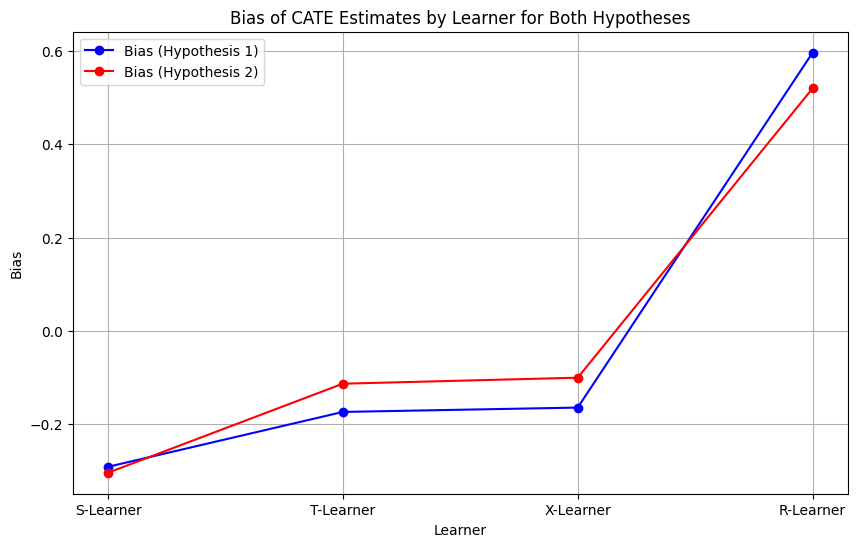

In [13]:
plt.figure(figsize=(10, 6))

# Plot Bias for Hypothesis 1
plt.plot(results_df["Learner"], results_df["Bias_Hypothesis_1"], marker='o', color='b', label="Bias (Hypothesis 1)")

# Plot Bias for Hypothesis 2
plt.plot(results_df["Learner"], results_df["Bias_Hypothesis_2"], marker='o', color='r', label="Bias (Hypothesis 2)")

# Add titles and labels
plt.title("Bias of CATE Estimates by Learner for Both Hypotheses")
plt.ylabel("Bias")
plt.xlabel("Learner")

# Add grid for better readability
plt.grid(True)

# Add legend to differentiate between Hypothesis 1 and Hypothesis 2
plt.legend()

# Display the plot
plt.show()
